# Practical Machine learning walkthrough


### Scikit-learn training and testing model
<img src="supervised_workflow.svg" width="50%">

### Loading the Iris Data with Scikit-learn

Taken from the [UCI machine learning repository](http://archive.ics.uci.edu/ml/), which hosts many of the commonly used datasets that are useful for benchmarking machine learning algorithms -- a very popular resource for machine learning practioners and researchers. Conveniently, some of these datasets are already included in scikit-learn.

For example, scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
  <img src="petal_sepal.jpg" alt="Sepal" style="width: 50%;"/>

(Image: "Petal-sepal". Licensed under CC BY-SA 3.0 via Wikimedia Commons - https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg#/media/File:Petal-sepal.jpg)

In [1]:
from sklearn.datasets import load_iris
# save "bunch" object containing iris dataset and its attributes
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [2]:
# print the names of the four features
print(iris.feature_names)
# print the iris data
print (iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.

In [3]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)
# print integers representing the species of each observation
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
# check the types of the features and response
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# check the shape of the features (first dimension = number of observations, second dimensions = number of features)
print(iris.data.shape)
# check the shape of the response (single dimension matching the number of observations)
print(iris.target.shape)

(150, 4)
(150,)


In [6]:
# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

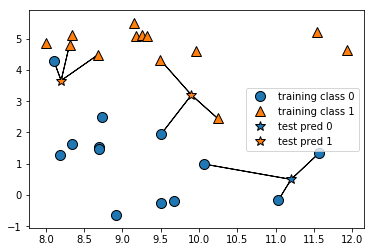

In [33]:
%matplotlib inline
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()
#print (knn)
knn.fit(X, y)

#y_pred = knn.predict(X)
#print(metrics.accuracy_score(y, y_pred))

print(knn.score(X, y))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


# Splitting data into Training and Testing set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
y_pred = knn.predict(X_test)
print('Accuracy of KNN n-5, on the Testing set: {:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of KNN n-5, on the Testing set: 0.974


In [11]:
y_pred = knn.predict(X_train)
print('Accuracy of KNN n-5, on the training set: {:.3f}'.format(metrics.accuracy_score(y_train, y_pred)))

Accuracy of KNN n-5, on the training set: 0.955


# Cross Validation

C:\Users\polyvista\Anaconda6\lib\site-packages\matplotlib\pyplot.py:2648: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


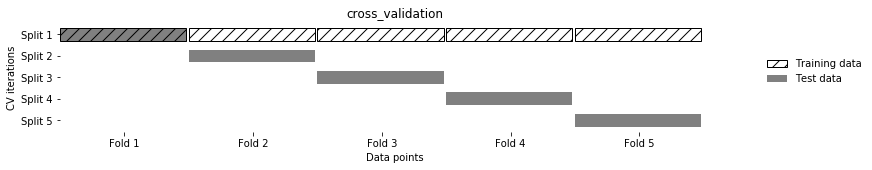

In [12]:
mglearn.plots.plot_cross_validation()

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, iris.data, iris.target)
print("cross-validation scores: ", scores)
scores.mean()
type(scores)

cross-validation scores:  [ 0.98039216  0.96078431  1.        ]


numpy.ndarray

In [14]:
scores = cross_val_score(knn, iris.data, iris.target, cv=5)
print("cross-validation scores: ", scores)
#scores.mean()

cross-validation scores:  [ 0.96666667  0.96666667  0.93333333  0.96666667  1.        ]


# Stratified K-Fold cross-validation

In [15]:
#from sklearn.datasets import load_iris
iris = load_iris()
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


C:\Users\polyvista\Anaconda6\lib\site-packages\mglearn\plot_cross_validation.py:121: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color=colors, hatch="//", edgecolor='k', align='edge')
C:\Users\polyvista\Anaconda6\lib\site-packages\mglearn\plot_cross_validation.py:125: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align='edge')
C:\Users\polyvista\Anaconda6\lib\site-packages\mglearn\plot_cross_validation.py:158: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  height=.6, color="grey", hatch="//", edgecolor='k', align='edge')
C:\Users\polyvista\Anaconda6\lib\site-packages\mglearn\plot_cross_validation.py:163: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh`

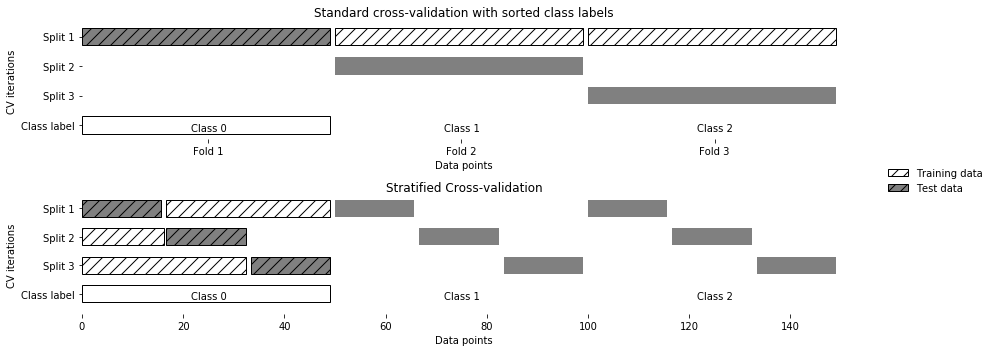

In [16]:
#% matplotlib inline
mglearn.plots.plot_stratified_cross_validation()

# Improving a model using hypermeters
----
Using neighbors = [1,2,3 . . . 20] 

Using weight_options = ['uniform', 'distance'] 

Using weight_options = ['uniform', 'distance'] and n_neighbors = [1,2,3 . . . 20] 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)
# Define a range of 1 to 21 (included) neighbors to be tested
neighbors_settings = range(1,21)
for n in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    print ('For neighbour = ', n,'--', 'Training accuracy', clf.score(X_train, y_train), '===', 'testing accuracy', clf.score(X_test, y_test))

For neighbour =  1 -- Training accuracy 1.0 === testing accuracy 0.973684210526
For neighbour =  2 -- Training accuracy 0.982142857143 === testing accuracy 0.947368421053
For neighbour =  3 -- Training accuracy 0.955357142857 === testing accuracy 0.973684210526
For neighbour =  4 -- Training accuracy 0.955357142857 === testing accuracy 0.973684210526
For neighbour =  5 -- Training accuracy 0.964285714286 === testing accuracy 0.973684210526
For neighbour =  6 -- Training accuracy 0.964285714286 === testing accuracy 0.973684210526
For neighbour =  7 -- Training accuracy 0.964285714286 === testing accuracy 1.0
For neighbour =  8 -- Training accuracy 0.982142857143 === testing accuracy 1.0
For neighbour =  9 -- Training accuracy 0.982142857143 === testing accuracy 1.0
For neighbour =  10 -- Training accuracy 0.973214285714 === testing accuracy 1.0
For neighbour =  11 -- Training accuracy 0.982142857143 === testing accuracy 1.0
For neighbour =  12 -- Training accuracy 0.982142857143 === tes

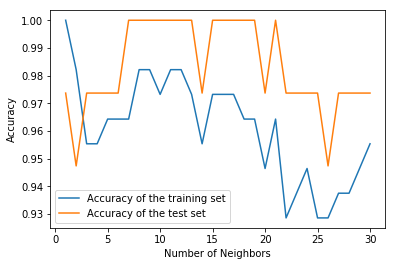

In [18]:
import matplotlib.pyplot as plt
# Resplit the data, with a different randomization (inspired by Muller & Guido ML book - https://www.amazon.com/dp/1449369413/)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)

# Create two lists for training and test accuracies
training_accuracy = []
test_accuracy = []

# Define a range of 1 to 31 (included) neighbors to be tested
neighbors_settings = range(1,31)

# Loop with the KNN through the different number of neighbors to determine the most appropriate (best)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Visualize results - to help with deciding which n_neigbors yields the best results (n_neighbors=6, in this case)
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)

weight_options = ['uniform', 'distance']
for w in weight_options:
    clf = KNeighborsClassifier(weights=w)
    clf.fit(X_train, y_train)
    print ('For Weight option = ', w,'--', 'Training accuracy', clf.score(X_train, y_train), '===', 'testing accuracy', clf.score(X_test, y_test))
    

For Weight option =  uniform -- Training accuracy 0.964285714286 === testing accuracy 0.973684210526
For Weight option =  distance -- Training accuracy 1.0 === testing accuracy 0.973684210526


In [20]:
# naive grid search implementation using Neighbour and Weights
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=0)
print("Size of training set: %d size of test set: %d" % (X_train.shape[0], X_test.shape[0]))
best_score = 0
for n in [1,2,3,4,5,6,7,8,9,10]:
    for w in ['uniform', 'distance']:
        # for each combination of parameters
        # train an knn
        knn = KNeighborsClassifier(n_neighbors= n,weights=w)
        knn.fit(X_train, y_train)
        # evaluate the knn on the test set
        score = knn.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'n_neighbors': n, 'weights': w}
print("best score: ", best_score)
print("best parameters: ", best_parameters)


Size of training set: 112 size of test set: 38
best score:  1.0
best parameters:  {'n_neighbors': 3, 'weights': 'uniform'}


# The danger of overfitting the parameters and the validation set

threefold_split


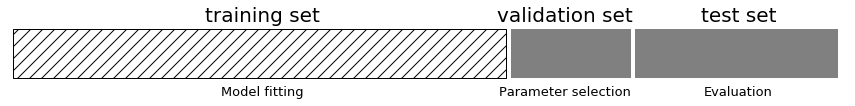

In [21]:
print("threefold_split")
mglearn.plots.plot_threefold_split()

In [22]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target,stratify=iris.target, random_state=0)
# split train+validation set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Size of training set: %d size of validation set: %d size of test set: %d" % (X_train.shape[0], X_valid.shape[0], X_test.shape[0]))


Size of training set: 84 size of validation set: 28 size of test set: 38


In [23]:
best_score = 0
for n in [1,2,3,4,5,6,7,8,9,10]:
    for w in ['uniform', 'distance']:
        # for each combination of parameters
        # train an KNN
        knn = KNeighborsClassifier(n_neighbors= n,weights=w)
        knn.fit(X_train, y_train)
        # evaluate the knn on the test set
        score = knn.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'n_neighbors': n, 'weights': w}
# rebuild a model on the combined training and validation set, and evaluate it on the test set
knn = KNeighborsClassifier(**best_parameters)
knn.fit(X_trainval, y_trainval)
test_score = knn.score(X_test, y_test)
print("best score on validation set: ", best_score)
print("best parameters: ", best_parameters)
print("test set score with best parameters: ", test_score)

best score on validation set:  1.0
best parameters:  {'n_neighbors': 9, 'weights': 'uniform'}
test set score with best parameters:  1.0


# Model improvement using hyperparameter tuning with cross-validation
----
For a better estimate of the generalization performance,
instead of using a single split into a training and a validation set, we can use crossvalidation
to evaluate the performance of each parameter combination.

In [24]:
import numpy as np
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=0)
best_score = 0
for n in [1,2,3,4,5,6,7,8,9,10]:
    for w in ['uniform', 'distance']:
        # for each combination of parameters
        # train an KNN
        knn = KNeighborsClassifier(n_neighbors= n,weights=w)
        # perform cross-validation
        scores = cross_val_score(knn, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'n_neighbors': n, 'weights': w}
# rebuild a model on the combined training and validation set, and evaluate it on the test set
knn = KNeighborsClassifier(**best_parameters)
knn.fit(X_trainval, y_trainval)
test_score = knn.score(X_test, y_test)
print("best score on validation set: ", best_score)
print("best parameters: ", best_parameters)
print("test set score with best parameters: ", test_score)


best score on validation set:  0.946861471861
best parameters:  {'n_neighbors': 3, 'weights': 'uniform'}
test set score with best parameters:  1.0


Trained Models Count?

# GridSearchCV (A meta classifier)
----
To use the GridSearchCV class, you first need to specify the
parameters you want to search over using a dictionary. GridSearchCV will then perform
all the necessary model fits. The keys of the dictionary are the names of parameters
we want to adjust

In [25]:
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10], 'weights':['uniform', 'distance']}
print (param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance']}


In [26]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=0)

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Fitting the GridSearchCV object not only searches for the best parameters, it also
automatically fits a new model on the whole training dataset with the parameters that
yielded the best cross-validation performance.

In [27]:
grid_search.score(X_test, y_test)

1.0

Choosing the parameters using cross-validation, we actually found a model that achieves
100% accuracy on the test set. The important part here is that we did not use the
test set to choose the parameters.

The parameters that were found are scored in the best_params_ attribute, and the
best cross-validation accuracy (the mean accuracy over the different splits for this
parameter setting) is stored in best_score_:

In [28]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 3, 'weights': 'uniform'}
0.946428571429


Again, be careful not to confuse best_score_ with the generalization performance of
the model as computed by the score method on the test set. Using the score method
(or evaluating the output of the predict method) employs a model trained on the
whole training set. The best_score_ attribute stores the mean validation crossvalidation
accuracy, with cross-validation performed on the training set.

Sometimes it is helpful to have access to the actual model that was found, for example
to look at coefficients or feature importances. You can access the model with the best
parameters trained on the whole training set using the best_estimator_ attribute.

Because grid_search itself has predict and score methods, using best_estimator_
is not needed to make predictions or evaluate the model.

In [29]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

# Analyzing the result of cross-validation

In [30]:
#grid_search.grid_scores_
grid_search.cv_results_

C:\Users\polyvista\Anaconda6\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\polyvista\Anaconda6\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\polyvista\Anaconda6\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\polyvista\Anaconda6\lib\site-package

{'mean_fit_time': array([ 0.00100007,  0.0006    ,  0.00020003,  0.00039997,  0.00040002,
         0.00019999,  0.00040002,  0.00040002,  0.00039997,  0.00039997,
         0.00060005,  0.00019999,  0.00040011,  0.00039997,  0.00040002,
         0.00040002,  0.00040002,  0.0006    ,  0.00039997,  0.0006001 ]),
 'mean_score_time': array([ 0.00120001,  0.0006001 ,  0.00080009,  0.00060005,  0.00060015,
         0.00080004,  0.0006    ,  0.00059996,  0.00060005,  0.00059996,
         0.0006001 ,  0.00080009,  0.00060005,  0.0006    ,  0.00079999,
         0.00080004,  0.00060005,  0.00060005,  0.00080004,  0.0006    ]),
 'mean_test_score': array([ 0.92857143,  0.92857143,  0.91071429,  0.92857143,  0.94642857,
         0.94642857,  0.9375    ,  0.94642857,  0.9375    ,  0.94642857,
         0.91964286,  0.92857143,  0.92857143,  0.9375    ,  0.92857143,
         0.9375    ,  0.92857143,  0.9375    ,  0.92857143,  0.9375    ]),
 'mean_train_score': array([ 1.        ,  1.        ,  0.962090

# Nested cross-validation with grid-search

In [31]:
scores = cross_val_score(GridSearchCV(KNeighborsClassifier(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [ 0.96666667  1.          0.96666667  0.93333333  1.        ]
Mean cross-validation score:  0.973333333333


# Use following algorithm to train and test

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
